Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


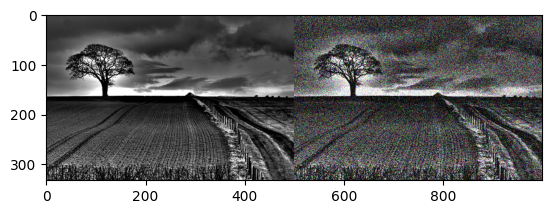

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

def gaussian_noise(image): 
    row,col,ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5

    gauss = np.random.normal(mean,sigma,(row,col,ch)) 
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    
    return noisy

img = cv.imread("example.jpeg")
img = img/255
noise_img = gaussian_noise(img) 
res = np.hstack((img,noise_img))
plt.imshow(res)
plt.show()

In [6]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

def saltPepperNoise(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    noisy = np.copy(image)
    
    num_salt = int(np.ceil(amount*image.size*s_vs_p))
    corrds = [](np.random.randint(0,i-1,num_salt) for i in image.shape) 
    noisy[corrds] = 1
    
    num_pep = int(np.ceil(amount*image.size*s_vs_p))
    corrds = [](np.random.randint(0,i-1,num_pep) for i in image.shape)
    noisy[corrds] = 0
    
    return noisy

img = cv.imread("example2.jpg")
img = img/255
cv.imwrite('example2_sp.jpg', saltPepperNoise(img))
img2 = cv.imread("example2_sp.jpg")
res = np.hstack((img,img2))
plt.imshow(res)
plt.show()

IndexError: index 827 is out of bounds for axis 0 with size 667

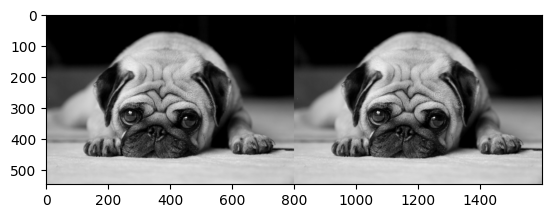

In [21]:
img = cv.imread("dog.jpg")
cv.imwrite('dog_sp.jpg',
            saltPepperNoise(img))
img2 = cv.imread("dog_sp.jpg")
res = np.hstack((img,img2))
plt.imshow(res)
plt.show()